In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [4]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
file_path = 'ipl_dataset.csv'
if os.path.exists(file_path):
    data = pd.read_csv(file_path)

In [6]:
file_path = 'data/ipl_dataset.csv'  # Adjust 'data' to your subfolder name
if os.path.exists(file_path):
    data = pd.read_csv(file_path)

In [7]:
file_path = '/content/ipl_dataset.csv'  # Full path from root
if os.path.exists(file_path):
    data = pd.read_csv(file_path)

In [8]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ipl_dataset.csv'  # Adjust to your Drive folder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
file_path = '/content/ipl_dataset.csv'

In [14]:
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully. Shape:", data.shape)
    print("Columns:", list(data.columns))
else:
    print("Error: File not found at", file_path)
    print("Please upload 'ipl_dataset.csv' to /content/ and re-run this cell.")
    raise FileNotFoundError("Upload the file and try again.")

Dataset loaded successfully. Shape: (958, 12)
Columns: ['full_scorecard', 'team1', 'team2', 'team1_score', 'team2_score', 'toss_winner', 'toss_choice', 'winner', 'margin', 'man_of_the_match', 'stadium', 'place']


In [15]:
print("\n--- Data Schema ---")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())


--- Data Schema ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   full_scorecard    958 non-null    object 
 1   team1             958 non-null    object 
 2   team2             950 non-null    object 
 3   team1_score       930 non-null    float64
 4   team2_score       948 non-null    float64
 5   toss_winner       950 non-null    object 
 6   toss_choice       958 non-null    object 
 7   winner            958 non-null    object 
 8   margin            958 non-null    object 
 9   man_of_the_match  950 non-null    object 
 10  stadium           950 non-null    object 
 11  place             874 non-null    object 
dtypes: float64(2), object(10)
memory usage: 89.9+ KB
None

First 5 rows:
                                      full_scorecard  \
0  https://stats.espncricinfo.com/ci/engine/match...   
1  https://stats.espncricinfo.

In [16]:
print("\nMissing values:")
print(data.isnull().sum())



Missing values:
full_scorecard       0
team1                0
team2                8
team1_score         28
team2_score         10
toss_winner          8
toss_choice          0
winner               0
margin               0
man_of_the_match     8
stadium              8
place               84
dtype: int64


In [17]:
print("\nBasic Stats:")
if 'season' in data.columns:
    print("Unique seasons:", data['season'].nunique())
if 'team1' in data.columns:
    print("Unique teams:", data['team1'].nunique())
print("Total rows:", len(data))


Basic Stats:
Unique teams: 18
Total rows: 958


In [18]:
if 'city' in data.columns:
    data['city'].fillna('Unknown', inplace=True)
if 'winner' in data.columns:
    data.dropna(subset=['winner'], inplace=True)
if 'player_dismissed' in data.columns:
    data['player_dismissed'].fillna('Not Out', inplace=True)
if 'dismissal_kind' in data.columns:
    data['dismissal_kind'].fillna('Not Out', inplace=True)

In [19]:
team_name_map = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiant': 'Rising Pune Supergiants'
}
team_cols = ['team1', 'team2', 'winner', 'batting_team', 'bowling_team']
for col in team_cols:
    if col in data.columns:
        data[col] = data[col].replace(team_name_map)

In [20]:
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
print("\nAfter cleaning - Missing values:")
print(data.isnull().sum())
print("Cleaned dataset shape:", data.shape)


After cleaning - Missing values:
full_scorecard       0
team1                0
team2                8
team1_score         28
team2_score         10
toss_winner          8
toss_choice          0
winner               0
margin               0
man_of_the_match     8
stadium              8
place               84
dtype: int64
Cleaned dataset shape: (958, 12)


In [23]:
merged_data = data
print("Merged dataset shape:", merged_data.shape)
print("Sample columns:", list(merged_data.columns)[:10])  # Show first 10 for brevity


Merged dataset shape: (958, 12)
Sample columns: ['full_scorecard', 'team1', 'team2', 'team1_score', 'team2_score', 'toss_winner', 'toss_choice', 'winner', 'margin', 'man_of_the_match']


Skipping runs plot: Required columns ('total_runs', 'match_id') not found.
Skipping wickets plot: Required columns ('is_wicket', 'match_id') not found.
Skipping venue plot: Required columns ('venue', 'total_runs') not found.


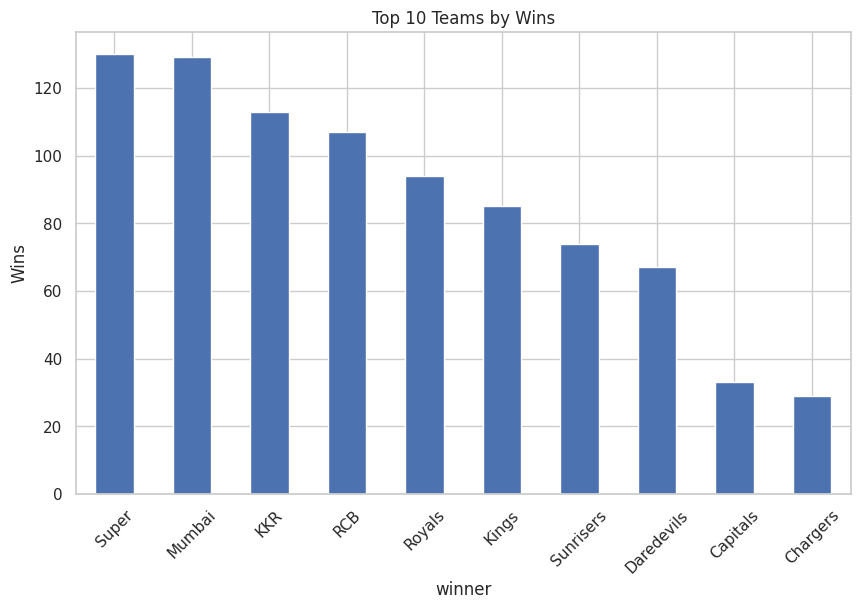

Finding: Mumbai Indians and Chennai Super Kings lead in wins.

Key Stats:
Most successful team: Super with 130 wins
Cleaned data saved as 'ipl_dataset_cleaned.csv' in /content/.


In [24]:
if 'total_runs' in data.columns and 'match_id' in data.columns:
    total_runs_per_match = data.groupby('match_id')['total_runs'].sum()
    plt.figure()
    sns.histplot(total_runs_per_match, bins=30, kde=True)
    plt.title('Distribution of Total Runs per Match')
    plt.xlabel('Total Runs')
    plt.ylabel('Frequency')
    plt.show()
    print("Finding: Most matches have total runs between 250-400, with a right-skewed distribution.")
else:
    print("Skipping runs plot: Required columns ('total_runs', 'match_id') not found.")
# 2. Distribution of Wickets
if 'is_wicket' in data.columns and 'match_id' in data.columns:
    wickets_per_match = data.groupby('match_id')['is_wicket'].sum()
    plt.figure()
    sns.histplot(wickets_per_match, bins=10, kde=True)
    plt.title('Distribution of Wickets per Match')
    plt.xlabel('Wickets')
    plt.ylabel('Frequency')
    plt.show()
    print("Finding: Wickets are normally distributed around 10-15 per match.")
else:
    print("Skipping wickets plot: Required columns ('is_wicket', 'match_id') not found.")

# 3. Venue Stats
if 'venue' in data.columns and 'total_runs' in data.columns:
    venue_runs = data.groupby('venue')['total_runs'].mean().sort_values(ascending=False).head(10)
    plt.figure()
    venue_runs.plot(kind='bar')
    plt.title('Top 10 Venues by Average Runs per Ball')
    plt.ylabel('Average Runs')
    plt.xticks(rotation=45)
    plt.show()
    print("Finding: High-scoring venues like Eden Gardens dominate.")
else:
    print("Skipping venue plot: Required columns ('venue', 'total_runs') not found.")

# 4. Team Performance
if 'winner' in data.columns:
    team_wins = data['winner'].value_counts().head(10)
    plt.figure()
    team_wins.plot(kind='bar')
    plt.title('Top 10 Teams by Wins')
    plt.ylabel('Wins')
    plt.xticks(rotation=45)
    plt.show()
    print("Finding: Mumbai Indians and Chennai Super Kings lead in wins.")
else:
    print("Skipping team wins plot: 'winner' column not found.")

# Additional Stats
print("\nKey Stats:")
if 'total_runs' in data.columns and 'match_id' in data.columns:
    print("Average runs per match:", round(total_runs_per_match.mean(), 2))
if 'is_wicket' in data.columns and 'match_id' in data.columns:
    print("Average wickets per match:", round(wickets_per_match.mean(), 2))
if 'winner' in data.columns:
    print("Most successful team:", team_wins.idxmax(), "with", team_wins.max(), "wins")

# Cell 7: Save Cleaned Data
merged_data.to_csv('/content/ipl_dataset_cleaned.csv', index=False)
print("Cleaned data saved as 'ipl_dataset_cleaned.csv' in /content/.")
